In [134]:
from datetime import datetime, timedelta
from collections import defaultdict
from time import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import tweepy

In [135]:
#inputs
bearer_token = "AAAAAAAAAAAAAAAAAAAAAH4BlAEAAAAA3Dd4SGtdK%2FWbAqlEdIcXzoPB4%2BA%3DwDjEbymhTQgnmvHM8Vvetae79bgdBz1eyHWSyXZVqRnCCir1nA" #mpolo
limit = 2 #number of requests of `max_results` tweets each

In [137]:
#create paginator
client = tweepy.Client(bearer_token)
paginator = tweepy.Paginator( #TODO vedi come filtrare via tutti i tweet con media file
    method=client.search_recent_tweets,
    limit=limit,
    query=(
        '(context:131.825047692124442624 OR context:152.825047692124442624) ' #https://github.com/twitterdev/twitter-context-annotations
        '-is:retweet ' #TODO check and search doc for other usefull operators
        'lang:en'),
    end_time=datetime.utcnow()-timedelta(days=6), #go backwards starting from 6 days ago
    expansions=['author_id'], #TODO search doc for other usefull expansions
    max_results=10, #TODO 100 after debugging (500 if academic research access)
    sort_order=None, #'recency' (default, most recent first) or 'relevancy' TODO test
    tweet_fields=['public_metrics'], #TODO search doc for other usefull tweet fields
    user_fields=['public_metrics']) #TODO search doc for usefull user fields

#download tweets
data = defaultdict(list)
for response in paginator:
    for tweet, user in zip(response.data, response.includes['users']):
        data['text'] += [tweet.text]
        data['likes'] += [tweet.public_metrics['like_count']]
        data['followers'] += [user.public_metrics['followers_count']]
        
#save tweets
os.makedirs('debug_sets', exist_ok=True)
set_id = int(time() % 1e6) #unique for 11 days
pd.DataFrame(data).to_csv(f'debug_sets/{set_id}.csv', index=False)
set_id

394387

TODO `search_recent_tweets` is up to 7 days. To search further back, use [search_all_tweets](https://docs.tweepy.org/en/stable/client.html#tweepy.Client.search_all_tweets) instead (and add `start_time` parameter). But it needs the [academic research access](https://developer.twitter.com/en/docs/projects). It also increases the monthly cap from 500,000 to 10 million.

In [138]:
#load tweets
df = pd.read_csv(f'debug_sets/{set_id}.csv')
df.head(2)

,text,likes,followers
0,"Aside from that lunch, it’s been water, water,...",0,313
1,Coronado Brewing Announces Major Additions to ...,1,12575


# ADJUST BELOW

In [ ]:
#between: https://stackoverflow.com/a/67711603

splits = [df_tweets[df_tweets['followers'].between(200*i, 200*(i+1), inclusive='left')] for i in range(10)]
for i, split in enumerate(splits):
    split['range'] = i
df = pd.concat(splits)
df = df.groupby(df['range']).mean() #poi mean quando trovi range significativi
df

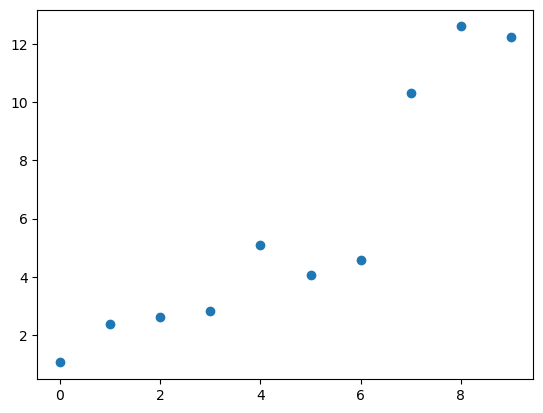

In [19]:
plt.scatter(df.index, df['likes'])